In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/loan.csv')
print(data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [ ]:
data_final= data.drop(['Loan_ID'],axis=1)
print(data_final)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [ ]:
data_final[["Gender","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Loan_Status"]] = data_final[["Gender","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Loan_Status"]].replace(0,np.nan)
print(data_final)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

<Axes: >

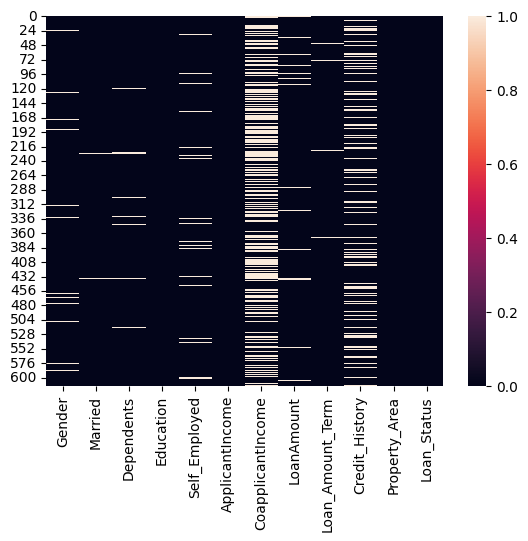

In [ ]:
sns.heatmap(data_final.isnull())

In [ ]:
data_final.fillna({'Gender':data_final['Gender'].mode()[0]},inplace=True)

<Axes: >

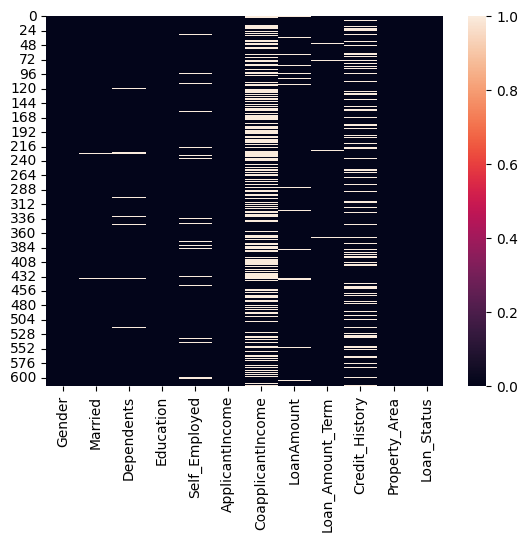

In [ ]:
sns.heatmap(data_final.isnull())

In [ ]:
data_final.fillna({'Gender':data_final['Gender'].mode()[0]},inplace=True)
data_final.fillna({'Dependents':data_final['Dependents'].mode()[0]},inplace=True)
data_final.fillna({'Education':data_final['Education'].mode()[0]},inplace=True)
data_final.fillna({'Self_Employed':data_final['Self_Employed'].mode()[0]},inplace=True)
data_final.fillna({'ApplicantIncome':data_final['ApplicantIncome'].mode()[0]},inplace=True)
data_final.fillna({'CoapplicantIncome':data_final['CoapplicantIncome'].mode()[0]},inplace=True)
data_final.fillna({'LoanAmount':data_final['LoanAmount'].mode()[0]},inplace=True)
data_final.fillna({'Loan_Amount_Term':data_final['Loan_Amount_Term'].mode()[0]},inplace=True)
data_final.fillna({'Credit_History':data_final['Credit_History'].mode()[0]},inplace=True)
data_final.fillna({'Property_Area':data_final['Property_Area'].mode()[0]},inplace=True)
data_final.fillna({'Loan_Status':data_final['Loan_Status'].mode()[0]},inplace=True)

<Axes: >

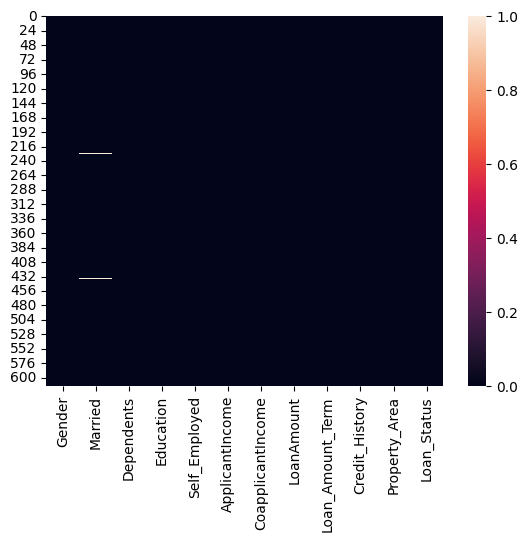

In [ ]:
sns.heatmap(data_final.isnull())

In [ ]:
data_final.fillna({'Married':data_final['Married'].mode()[0]},inplace=True)

<Axes: >

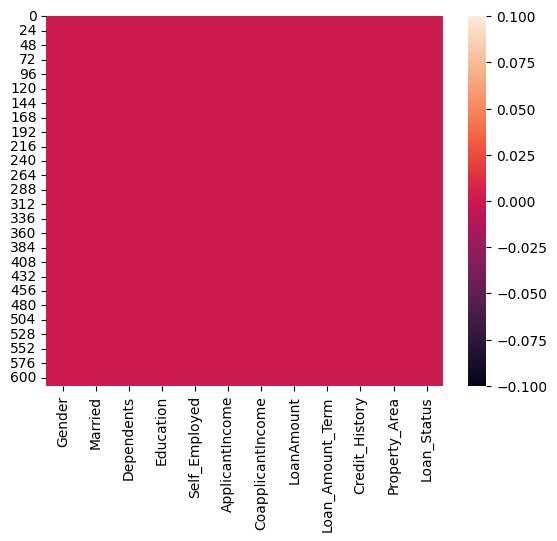

In [ ]:
sns.heatmap(data_final.isnull())

In [ ]:
x=data_final.iloc[:,:-1].values
y=data_final.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

To fix the `ValueError`, I'll convert the categorical features into numerical representations using one-hot encoding. This will create new binary columns for each category in the original columns.

In [ ]:
data_encoded = pd.get_dummies(data_final, drop_first=True)
display(data_encoded.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,1666.0,120.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,1666.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,1666.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True


Now that the data is encoded, I will redefine the features (`x`) and target (`y`) and split the data into training and testing sets again.

In [ ]:
x = data_encoded.drop('Loan_Status_Y', axis=1)
y = data_encoded['Loan_Status_Y']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Now you can run the cell to fit the KNeighborsClassifier model.

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

<Axes: >

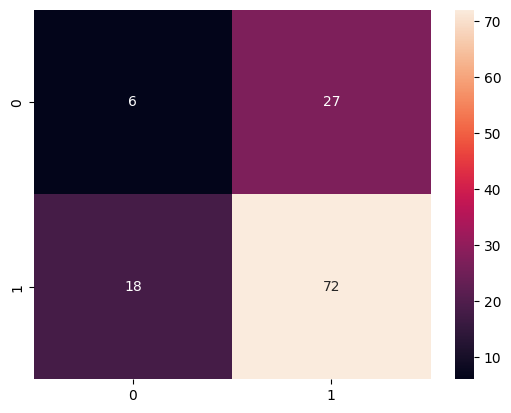

In [ ]:
knn_pred=knn.predict(x_test)
cmknn=confusion_matrix(y_test,knn_pred)
sns.heatmap(cmknn,annot=True)

In [ ]:
acknn=accuracy_score(y_test,knn_pred)
print(acknn)

0.6341463414634146


In [ ]:
crknn=classification_report(y_test,knn_pred)
print(crknn)

              precision    recall  f1-score   support

       False       0.25      0.18      0.21        33
        True       0.73      0.80      0.76        90

    accuracy                           0.63       123
   macro avg       0.49      0.49      0.49       123
weighted avg       0.60      0.63      0.61       123



In [ ]:
knn_pred = knn.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, knn_pred))
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))

Confusion Matrix:
[[ 6 27]
 [18 72]]

Accuracy Score:
0.6341463414634146

Classification Report:
              precision    recall  f1-score   support

       False       0.25      0.18      0.21        33
        True       0.73      0.80      0.76        90

    accuracy                           0.63       123
   macro avg       0.49      0.49      0.49       123
weighted avg       0.60      0.63      0.61       123



In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<Axes: >

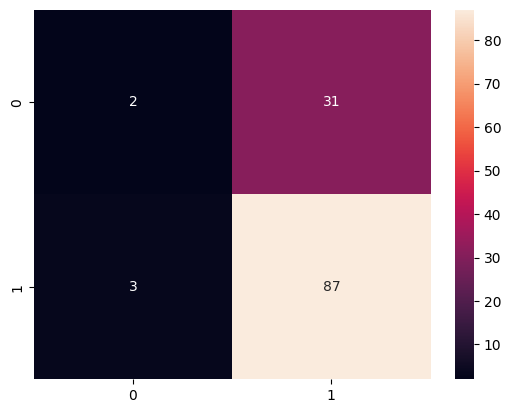

In [ ]:
Logm_pred=lr.predict(x_test)
cmLogm=confusion_matrix(y_test,Logm_pred)
sns.heatmap(cmLogm,annot=True)

In [ ]:
acLogm=accuracy_score(y_test,Logm_pred)
print(acLogm)

0.7235772357723578


In [ ]:
acLogm = accuracy_score(y_test, Logm_pred)
print("Accuracy Score (Logistic Regression):")
print(acLogm)

crLogm = classification_report(y_test, Logm_pred)
print("\nClassification Report (Logistic Regression):")
print(crLogm)

Accuracy Score (Logistic Regression):
0.7235772357723578

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       0.40      0.06      0.11        33
        True       0.74      0.97      0.84        90

    accuracy                           0.72       123
   macro avg       0.57      0.51      0.47       123
weighted avg       0.65      0.72      0.64       123



In [ ]:
crLogm=classification_report(y_test,Logm_pred)
print(crLogm)

              precision    recall  f1-score   support

       False       0.40      0.06      0.11        33
        True       0.74      0.97      0.84        90

    accuracy                           0.72       123
   macro avg       0.57      0.51      0.47       123
weighted avg       0.65      0.72      0.64       123



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
nb_pred=nb.predict(x_test)

In [ ]:
nbac=accuracy_score(y_test,nb_pred)
print(nbac)

0.7235772357723578


<Axes: >

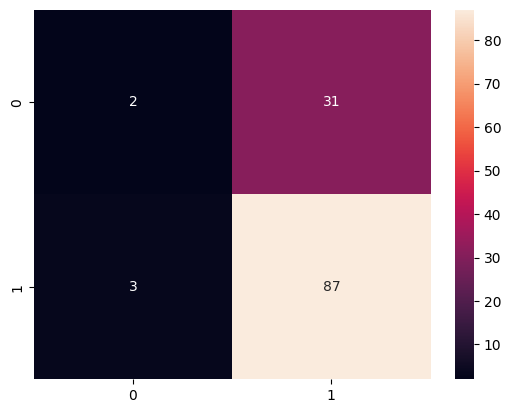

In [ ]:
cmnb = confusion_matrix(y_test, nb_pred)
sns.heatmap(cmnb, annot=True)

In [ ]:
crnb=classification_report(y_test,nb_pred)
print(crnb)

              precision    recall  f1-score   support

       False       0.40      0.06      0.11        33
        True       0.74      0.97      0.84        90

    accuracy                           0.72       123
   macro avg       0.57      0.51      0.47       123
weighted avg       0.65      0.72      0.64       123



In [ ]:
from sklearn.svm import SVC
svc_model=SVC(kernel='linear')
svc_model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
svm_pred=svc_model.predict(x_test)

In [ ]:
acsvm=accuracy_score(y_test,svm_pred)
print(acsvm)

0.7317073170731707


<Axes: >

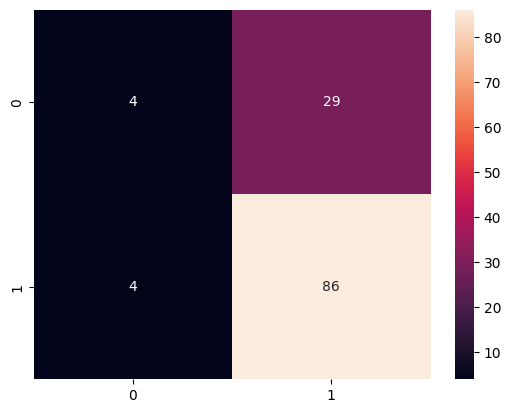

In [ ]:
cmsvm=confusion_matrix(y_test,svm_pred)
sns.heatmap(cmsvm,annot=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred=dt.predict(x_test)

In [ ]:
acdt=accuracy_score(y_test,dt_pred)
print(acdt)

0.6910569105691057


<Axes: >

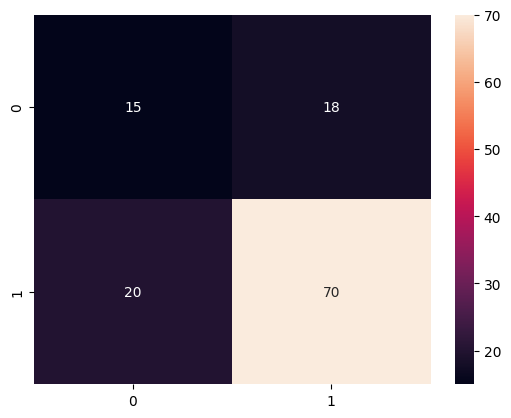

In [ ]:
cmdt=confusion_matrix(y_test,dt_pred)
sns.heatmap(cmdt,annot=True)

In [ ]:
crdt=classification_report(y_test,dt_pred)
print(crdt)

              precision    recall  f1-score   support

       False       0.43      0.45      0.44        33
        True       0.80      0.78      0.79        90

    accuracy                           0.69       123
   macro avg       0.61      0.62      0.61       123
weighted avg       0.70      0.69      0.69       123



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rf_pred=rf.predict(x_test)

In [ ]:
acrf=accuracy_score(y_test,rf_pred)
print(acrf)

0.6910569105691057


<Axes: >

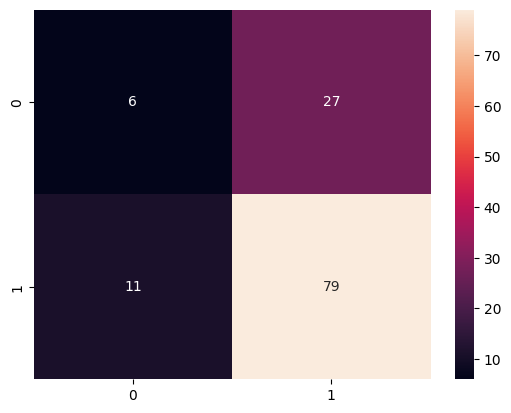

In [ ]:
cmrf=confusion_matrix(y_test,rf_pred)
sns.heatmap(cmrf,annot=True)

In [ ]:
crrf=classification_report(y_test,rf_pred)
print(crrf)

              precision    recall  f1-score   support

       False       0.35      0.18      0.24        33
        True       0.75      0.88      0.81        90

    accuracy                           0.69       123
   macro avg       0.55      0.53      0.52       123
weighted avg       0.64      0.69      0.65       123

